### Get temperatures for every day from May 2016 through July 2018
 * date range of the 311 dataset 2016-05-20T07:19:00 - 2018-07-29T12:01:00

In [1]:
from datetime import datetime as dt
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import os

from config import api_key

In [2]:
settings = {'units': 'imperial', 'appid': api_key,}

In [3]:
# define time period
start_date = dt(2016, 5, 1).timestamp()
end_date = dt(2018, 7, 30).timestamp()

In [4]:
owm_path = os.path.join('..', '..', 'raw', 'owm_sandiego_2013_2018.csv')
df_raw = pd.read_csv(owm_path)

In [5]:
df = df_raw.loc[(df_raw['dt'] >= start_date) & (df_raw['dt'] <= end_date)]

In [6]:
df.columns

Index(['dt', 'dt_iso', 'city_id', 'city_name', 'lat', 'lon', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [7]:
df = df[['dt_iso', 'temp', 'pressure', 'humidity', 'weather_main']]

In [8]:
def k_to_f(k):
    return round((k * (9 / 5)) - 459.67, 2)



In [9]:
df['temp'] = df['temp'].apply(k_to_f)
df.rename(columns={'temp': 'temp_f'}, inplace=True)

In [10]:
df['temp_f'].describe()

count    22958.000000
mean        63.470167
std          9.265817
min         28.940000
25%         57.040000
50%         62.870000
75%         69.280000
max        104.380000
Name: temp_f, dtype: float64

In [11]:
out_path = os.path.join('..', '..', 'data', 'owm_2016_2018.csv')
df.to_csv(out_path, index=False)

In [12]:
df.head()

,dt_iso,temp_f,pressure,humidity,weather_main
13827,2016-05-01 07:00:00 +0000 UTC,54.37,1012,72,Clouds
13828,2016-05-01 08:00:00 +0000 UTC,53.69,1012,72,Haze
13829,2016-05-01 09:00:00 +0000 UTC,52.63,1012,72,Haze
13830,2016-05-01 09:00:00 +0000 UTC,52.63,1012,72,Mist
13831,2016-05-01 10:00:00 +0000 UTC,51.84,1011,77,Mist


In [13]:
df.count()

dt_iso          22958
temp_f          22958
pressure        22958
humidity        22958
weather_main    22958
dtype: int64

In [14]:
short = df.head(10)

In [15]:
def scatter_format(x, y):
    xtitle = x.title()
    ytitle = y.title()
    plot_title = '_'.join([xtitle, 'by', ytitle])
    
    x_lims = [min(df[x]) - 5, max(df[x]) + 5]
    plt_width = sum(map(abs, x_lims))
    
    fig, ax = plt.subplots(figsize=[16, 8])
    ax.scatter(df[x], df[y], s=10, c='#323232', zorder=2)
    plt.xlim(x_lims)
    plt.ylim(lat_range)
    plt.yticks(np.arange(lat_range[0], lat_range[1] + 1, 30))
    plt.title(plot_title.replace('_', ' '), fontsize=32, pad=32)
    
    label_size = 24
    plt.xlabel(xtitle, fontsize=label_size, labelpad=label_size)
    plt.ylabel(ytitle, fontsize=label_size, labelpad=label_size)
    
    BG = plt.imread(os.path.join('resource', 'equidistant_cylindrical.png'))
    plt.imshow(BG, aspect='auto', alpha=0.5, extent=(x_lims + lat_range))
    
    note = ('* point positions over background'
            + ' map reflect latitude only')
    
    plt.text(1, -0.1, note, transform=ax.transAxes, ha='right')
    
    figure_file_name = os.path.join(fig_out, plot_title.lower())
    plt.savefig(figure_file_name)
    
    

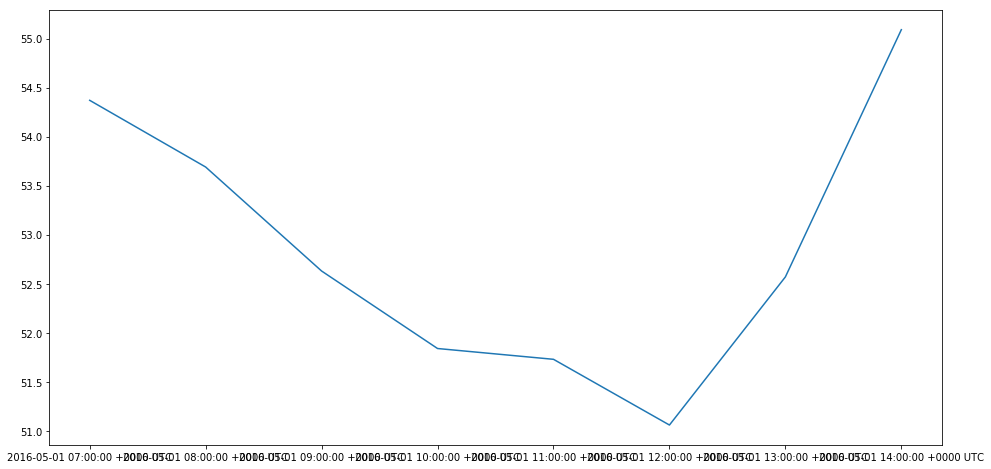

In [16]:
fig, ax = plt.subplots(figsize=[16, 8])
ax.plot(short['dt_iso'], short['temp_f'])